In [4]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve

In [7]:
mnist = pd.read_csv("Datasets/MNIST/mnist_test.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist.shape

(10000, 785)

In [16]:
mnist_X = mnist.drop("label",1)
mnist_X
mnist_y = mnist["label"]
mnist_y

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [18]:
mnist_y.values

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
X = mnist_X.values
y = mnist_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print("X train :",X_train.shape, "-- X test :", X_test.shape
     ,"\nY train :",y_train.shape, "-- Y test :", y_test.shape)

X train : (8000, 784) -- X test : (2000, 784) 
Y train : (8000,) -- Y test : (2000,)


In [36]:
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

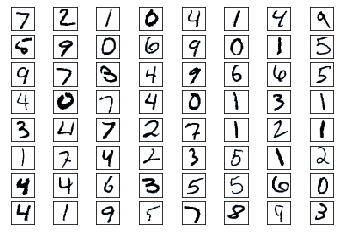

In [52]:
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = mnist_X.iloc[digit_num].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    plt.xticks([])
    plt.yticks([])

In [76]:
model = RandomForestClassifier(n_estimators=10, max_depth=10)
model.fit(X_train,y_train)

pred = model.predict(X_test)

rf_probs = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

#sizes = range(1000, 6666, 1000)
#train_size, train_score, val_score = learning_curve(rf_lrn, X, y, train_sizes=sizes, cv=3)

ValueError: multiclass format is not supported

#  MILAN POLLUTION RF REGRESSOR

In [170]:
dataset = pd.read_csv("Datasets/RilevazioneQA/qaria_2019.csv")
dataset.head()

,stazione_id,data,inquinante,valore
0,3,2019/01/03,NO2,51.0
1,3,2019/01/03,CO_8h,1.2
2,4,2019/01/03,PM10,29.0
3,4,2019/01/03,NO2,139.0
4,4,2019/01/03,CO_8h,1.3


In [84]:
dataset.shape

(6162, 4)

In [85]:
dataset["inquinante"]

0         NO2
1       CO_8h
2        PM10
3         NO2
4       CO_8h
        ...  
6157      NO2
6158       O3
6159      NO2
6160    CO_8h
6161     C6H6
Name: inquinante, Length: 6162, dtype: object

In [86]:
dataset.dtypes


stazione_id      int64
data            object
inquinante      object
valore         float64
dtype: object

In [87]:
dataset.describe()

,stazione_id,valore
count,6162.000000,4488.000000
mean,4.615385,35.406009
std,2.167715,39.452066
min,1.000000,0.250000
25%,2.000000,2.100000
50%,4.500000,21.000000
75%,6.000000,60.000000
max,8.000000,234.000000


In [171]:
indexName = dataset[ dataset["inquinante"]!="PM10"].index
indexName
dataset.drop(indexName, inplace=True)
dataset = dataset.dropna()
dataset.describe()
dataset

,stazione_id,data,inquinante,valore
2,4,2019/01/03,PM10,29.0
9,2,2019/01/03,PM10,20.0
15,6,2019/01/03,PM10,24.0
20,7,2019/01/03,PM10,32.0
29,4,2019/01/04,PM10,25.0
...,...,...,...,...
6120,2,2019/12/30,PM10,59.0
6125,6,2019/12/30,PM10,69.0
6139,4,2019/12/31,PM10,57.0
6146,2,2019/12/31,PM10,51.0


In [186]:
y = dataset.iloc[:, 3].values
lenght = [i for i in range(1,len(y)+1)]
dataset["n"] = lenght
dataset
x = dataset.iloc[:,4:5]
X = x

In [187]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

In [188]:
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [211]:
# Step 4 - Predict
time = 1000000
y_pred = regressor.predict([[time]])
print('The predicted value of PM10 at time ',time,'  is ',y_pred)

The predicted value of PM10 at time  1000000   is  [57.2]
